In [48]:
import numpy as np

def A_inv(N,a,d):
    A = np.zeros((N, N))
    for i in range(N-1):
        A[i+1,i] = -a
    for i in range(N):
        A[i,i] = 1
    return A/d

def b(N, x_bar, a):
    return np.array([-x_bar*(a)**n for n in range(1,N+1)])

In [2]:
#2.(ii)
N = 40
a = 1
d = -0.01 
x_bar = 1
γ = [10**(-3), 10**(-2), 0.1, 1]

A = np.linalg.inv(A_inv(N,a,d))
b = b(N,x_bar,a)
#The columns of U conrrespond to the control signals for each value of γ
U = np.zeros((N,4))
# X_u are the optimal trajectories:
X_u = np.zeros((N+1,4))

for i in range(4):
    U[:,i] = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)+γ[i]/2*np.identity(N)), np.transpose(A)), b)
    X_u[1:,i] = np.matmul(A, U[:,i])-b
    X_u[0, i] = x_bar

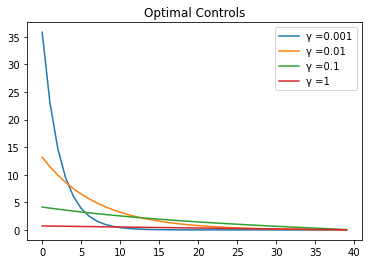

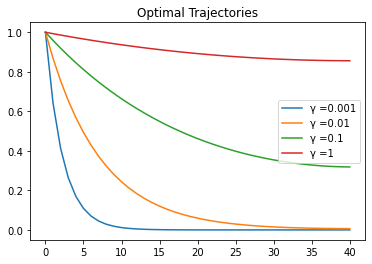

In [4]:
#2.(ii)
import matplotlib.pyplot as plt


plt.title('Optimal Controls')
for i in range(4):
    plt.plot(U[:,i], label = 'γ =' + str(γ[i]), markersize = 1)
    
leg = plt.legend()
plt.show()

plt.title('Optimal Trajectories')
for i in range(4):
    plt.plot(X_u[:,i], label = 'γ =' + str(γ[i]), markersize = 1)
    
leg = plt.legend()
plt.show()


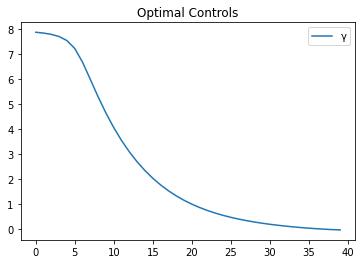

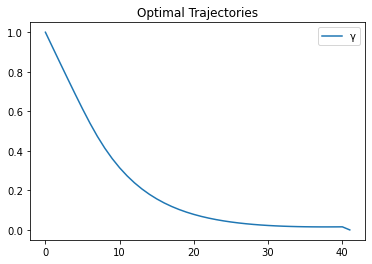

In [4]:
#2.(iii)
#Use gradient descent using exact scaled backtracking: smallest number of iterations to convergence
# compute gradient of objective function

N = 40
a = 1
d = -0.01
x_bar = 1
umax = 8
γ = 10**(-2)
δ = 10**(-2)
ϵ = 10**(-3)
u0 = [umax/2]*N

A = np.linalg.inv(A_inv(N,a,d))
b = b(N,x_bar,a)

                     
def descent(s, u0, Gf):
    #use params: s = 1 -> constant timestep, ϵ tolerance 10**-3
    u = u0
    grad = Gf(u)
    G = np.linalg.norm(grad)
    while G > ϵ :
        u = u - s*grad
        grad = Gf(u)
        G = np.linalg.norm(grad)
    return u

#The columns of U conrrespond to the control signals for each value of γ
U = [0]*N
# X_u are the optimal trajectories:
X_u = [0]*(N+1)

Gf = lambda u: np.array([2*np.matmul(np.matmul(np.transpose(A),A),u)[i]-2*(np.matmul(np.transpose(A),b)[i])+δ/(umax-u[i])+γ*u[i] for i in range(N)])
U = descent(1, u0, Gf)
X_u[1:-1] = np.matmul(A, U)-b
X_u[0] = x_bar

import matplotlib.pyplot as plt

plt.title('Optimal Controls')
plt.plot(U, label = 'γ', markersize = 1)
leg = plt.legend()
plt.show()

plt.title('Optimal Trajectories')
plt.plot(X_u, label = 'γ', markersize = 1)
leg = plt.legend()
plt.show()


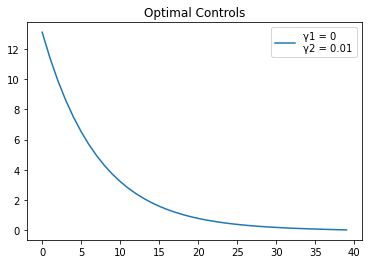

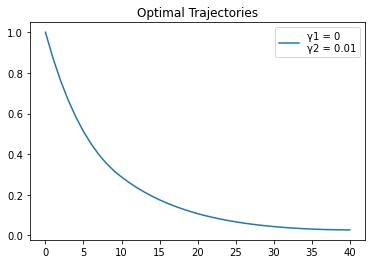

In [40]:
#2(iv) i)

N = 40
a = 1
d = -0.01
x_bar = 1
ϵ = 3
ω = 10**(-3)
γ2 = 10**(-2)
γ1 = 0
u0 = [0]*N


A = np.linalg.inv(A_inv(N,a,d))
b = b(N,x_bar,a)

def L_ϵ(u):
    s = 0
    for i in range(N):
        if abs(u[i]) <=ϵ:
            s+= 0.5*(u[i])**2
        else:
            s+= ϵ*(abs(u[i])-ϵ/2)
    return s

        
def GL_ϵ(u):
    v = [0]*N
    for i in range(N):
        if abs(u[i]) <=ϵ:
            v[i] = u[i]
        else:
            v[i] = ϵ*np.sign(u[i])
    
    return np.array(v)
        


def backtracking(α, β, s, u0, f, Gf):
    u = u0
    G = np.linalg.norm(Gf(u))
    grad = Gf(u)
    func = f(u)
    while G > ω :
        t = s
        d = - grad
        while (f(u)-f(u+t*d)+α*t*np.dot(Gf(u),d)) < 0:
            t = β*t
        u = u + t*d
        func = f(u)
        G = np.linalg.norm(Gf(u))
        grad = Gf(u)
    return u

#The columns of U conrrespond to the control signals for each value of γ
U1 = [0]*N
# X_u are the optimal trajectories:
X_u1 = [0]*(N+1)

f = lambda u: np.linalg.norm(np.matmul(A,u)-b)**2+γ2/2*np.linalg.norm(u)**2+γ1*L_ϵ(u)
Gf = lambda u: np.array([2*np.matmul(np.matmul(np.transpose(A),A),u)[i]-2*(np.matmul(np.transpose(A),b)[i])+γ2*u[i]+γ1*GL_ϵ(u)[i] for i in range(N)])
U1 = backtracking(0.5, 0.5, 1, u0, f, Gf)
X_u1[1:] = np.matmul(A, U)- b
X_u1[0] = x_bar

import matplotlib.pyplot as plt

plt.title('Optimal Controls')
plt.plot(U1, label = 'γ1 = 0\nγ2 = '+str(10**(-2)), markersize = 1)
leg = plt.legend()
plt.show()

plt.title('Optimal Trajectories')
plt.plot(X_u1, label = 'γ1 = 0\nγ2 = '+str(10**(-2)), markersize = 1)
leg = plt.legend()
plt.show()

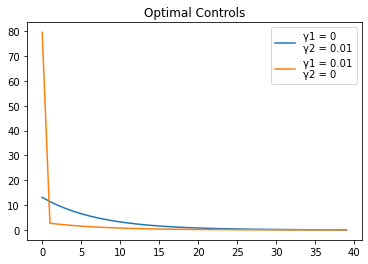

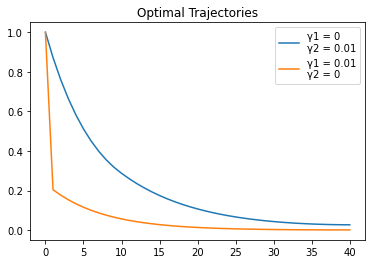

In [51]:
#2(iv) ii)

N = 40
a = 1
d = -0.01
x_bar = 1
ϵ = 3
ω = 10**(-3)
γ1 = 10**(-2)
γ2 = 0
u0 = [1]*N#np.array([N-n for n in range(N)])/N


A = np.linalg.inv(A_inv(N,a,d))
b = b(N,x_bar,a)

def L_ϵ(u):
    s = 0
    for i in range(N):
        if abs(u[i]) <=ϵ:
            s+= 0.5*(u[i])**2
        else:
            s+= ϵ*(abs(u[i])-ϵ/2)
    return s

        
def GL_ϵ(u):
    v = [0]*N
    for i in range(N):
        if abs(u[i]) <=ϵ:
            v[i] = u[i]
        else:
            v[i] = ϵ*np.sign(u[i])
    
    return np.array(v)
        


def backtracking(α, β, s, u0, f, Gf):
    # params: 0.1, 0.1, 1
    u = u0
    G = np.linalg.norm(Gf(u))
    grad = Gf(u)
    func = f(u)
    while G > ω :
        t = s
        d = - grad
        while (f(u)-f(u+t*d)+α*t*np.dot(Gf(u),d)) < 0:
            t = β*t
        u = u + t*d
        func = f(u)
        G = np.linalg.norm(Gf(u))
        grad = Gf(u)
    return u

#The columns of U conrrespond to the control signals for each value of γ
U2 = [0]*N
# X_u are the optimal trajectories:
X_u2 = [0]*(N+1)

f = lambda u: np.linalg.norm(np.matmul(A,u)-b)**2+γ2/2*np.linalg.norm(u)**2+γ1*L_ϵ(u)
Gf = lambda u: np.array([2*np.matmul(np.matmul(np.transpose(A),A),u)[i]-2*(np.matmul(np.transpose(A),b)[i])+γ2*u[i]+γ1*GL_ϵ(u)[i] for i in range(N)])
U2 = backtracking(0.1, 0.1, 1, u0, f, Gf)
X_u2[1:] = np.matmul(A, U)-b
X_u2[0] = x_bar

import matplotlib.pyplot as plt

plt.title('Optimal Controls')
plt.plot(U1, label = 'γ1 = 0\nγ2 = '+str(10**(-2)), markersize = 1)
plt.plot(U2, label = 'γ1 = '+str(10**(-2))+'\nγ2 = 0', markersize = 1)
leg = plt.legend()
plt.show()

plt.title('Optimal Trajectories')
plt.plot(X_u1, label = 'γ1 = 0\nγ2 = '+str(10**(-2)), markersize = 1)
plt.plot(X_u2, label = 'γ1 = '+str(10**(-2))+'\nγ2 = 0', markersize = 1)
leg = plt.legend()
plt.show()